# PORTUGAL: Shapefiles gerais

### Some tests using Portugal Maps and information about the country to plot then using the Geo Spacial reference

### Manuel Robalinho - Set 2018

 http://forest-gis.com/2012/01/portugal-shapefiles-gerais-do-pais.html/
 
 https://www.europeandataportal.eu/data/en/dataset?q=portugal&country=pt
 
 http://www.mapcruzin.com/free-portugal-arcgis-maps-shapefiles.htm
 

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd


In [2]:
path = 'ML/GeoPandas/Portugal/'

In [3]:
# Tables Portugal / Distritos / Concelhos
uf_pt1 = gpd.read_file(path + 'PRT_adm_shp/PRT_adm0.shp')
uf_pt2 = gpd.read_file(path + 'PRT_adm_shp/PRT_adm1.shp')
uf_pt3 = gpd.read_file(path + 'PRT_adm_shp/PRT_adm2.shp')


In [4]:
# Portugal
uf_pt1.head()

,ID_0,ISO,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,NAME_VARIA,NAME_NONLA,NAME_FRENC,...,CARICOM,EU,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,geometry
0,182,PRT,Portugal,PORTUGAL,Portugal,Portugal,None,Azores|Madeira,None,Portugal,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(POLYGON ((-16.05834770202637 30.0301990509033...


In [5]:
# Portugal - Distritos
uf_pt2.head()
uf_pt2[uf_pt2.TYPE_1 == 'Regiões autônoma'].head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
2,182,PRT,Portugal,3,Azores,PT.AC,0,None,Regiões autônoma,'Autonomous Region',None,Açores,(POLYGON ((-25.08909606933588 37.0156211853027...
12,182,PRT,Portugal,13,Madeira,None,0,None,Regiões autônoma,'Autonomous Region',None,None,(POLYGON ((-16.05834770202637 30.0301990509034...


In [6]:
# Delete information about Autonomos Regions (Açores e Madeira)
uf_pt2x = uf_pt2[uf_pt2.TYPE_1 != 'Regiões autônoma']

In [7]:
# Portugal - Concelhos
uf_pt3.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291391372675 38.7650718688966, ..."
1,182,PRT,Portugal,1,Évora,2,Alandroal,PT.EV.AL,0,0701,Concelho,Municipality,None,None,POLYGON ((-7.259370803833008 38.77350616455101...
2,182,PRT,Portugal,1,Évora,3,Arraiolos,PT.EV.AR,0,0702,Concelho,Municipality,None,None,POLYGON ((-7.886110782623234 38.92494583129894...
3,182,PRT,Portugal,1,Évora,4,Borba,PT.EV.BO,0,0703,Concelho,Municipality,None,None,POLYGON ((-7.463624954223576 38.92343521118158...
4,182,PRT,Portugal,1,Évora,5,Estremoz,PT.EV.ES,0,0704,Concelho,Municipality,None,None,POLYGON ((-7.527699947357121 39.00079727172857...


In [8]:
# Delete information about Autonomos Regions (Açores e Madeira)
uf_pt3x = uf_pt3.copy()
uf_pt3x = uf_pt3x[uf_pt3x.NAME_1 != 'Madeira']
uf_pt3x = uf_pt3x[uf_pt3x.NAME_1 != 'Açores']
uf_pt3x = uf_pt3x[uf_pt3x.NAME_1 != 'Azores']

# Managing INTERSECTS in Geo Spacial points betwen DISTRITS and CONCELHOS - Excluded Acores e Madeira

#concelhos_with_distritos = gpd.sjoin(uf_pt2x, uf_pt3, how='inner', op='intersects')
#concelhos_with_distritos = gpd.sjoin(uf_pt2x, uf_pt3, how='left', op='within')
uf_pt3x.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291391372675 38.7650718688966, ..."
1,182,PRT,Portugal,1,Évora,2,Alandroal,PT.EV.AL,0,0701,Concelho,Municipality,None,None,POLYGON ((-7.259370803833008 38.77350616455101...
2,182,PRT,Portugal,1,Évora,3,Arraiolos,PT.EV.AR,0,0702,Concelho,Municipality,None,None,POLYGON ((-7.886110782623234 38.92494583129894...
3,182,PRT,Portugal,1,Évora,4,Borba,PT.EV.BO,0,0703,Concelho,Municipality,None,None,POLYGON ((-7.463624954223576 38.92343521118158...
4,182,PRT,Portugal,1,Évora,5,Estremoz,PT.EV.ES,0,0704,Concelho,Municipality,None,None,POLYGON ((-7.527699947357121 39.00079727172857...


In [9]:
concelhos_with_distritos =  uf_pt3x.copy()
# Filter only one district Acores
#concelhos_with_distritos[concelhos_with_distritos.HASC_1 == 'PT.AC'].head()

concelhos_with_distritos[concelhos_with_distritos.NAME_1  == 'Porto'].head()


,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
208,182,PRT,Portugal,15,Porto,207,Amarante,PT.PO.AM,0,1301,Concelho,Municipality,None,None,POLYGON ((-7.972868919372559 41.36389541625971...
209,182,PRT,Portugal,15,Porto,208,Baião,PT.PO.BA,0,1302,Concelho,Municipality,None,None,POLYGON ((-7.884912014007568 41.24785995483404...
210,182,PRT,Portugal,15,Porto,209,Felgueiras,PT.PO.FE,0,1303,Concelho,Municipality,None,None,"POLYGON ((-8.20706844329834 41.4108161926269, ..."
211,182,PRT,Portugal,15,Porto,210,Gondomar,PT.PO.GO,0,1304,Concelho,Municipality,None,None,"POLYGON ((-8.52708625793457 41.20302581787109,..."
212,182,PRT,Portugal,15,Porto,211,Lousada,PT.PO.LO,0,1305,Concelho,Municipality,None,None,POLYGON ((-8.316142082214242 41.35116195678711...


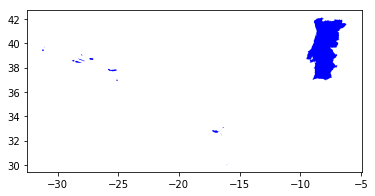

In [10]:
# Portugal
uf_pt1.plot(color='blue')

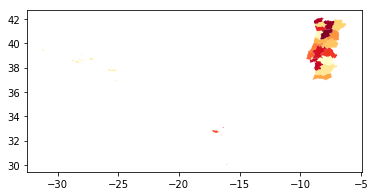

In [11]:
# Distritos
uf_pt2.plot(cmap='YlOrRd')

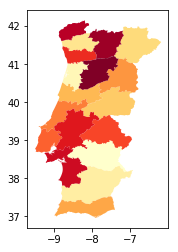

In [12]:
# Distritos - Exclude Açores and Madeira
uf_pt2x.plot(cmap='YlOrRd')

In [13]:
# Transform POLYGON to POINT
# copy poly to new GeoDataFrame
points = uf_pt2x.copy()
# change the geometry
points.geometry = points['geometry'].centroid
# same crs
#points.crs = poly.crs
points.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,182,PRT,Portugal,1,Évora,PT.EV,0,None,Distrito,District,None,None,POINT (-7.841807617604943 38.60387237507667)
1,182,PRT,Portugal,2,Aveiro,PT.AV,0,01,Distrito,District,None,None,POINT (-8.464918562075658 40.72356219053533)
3,182,PRT,Portugal,4,Beja,PT.BE,0,02,Distrito,District,None,None,POINT (-7.943892470329469 37.82970596252276)
4,182,PRT,Portugal,5,Braga,PT.BR,0,03,Distrito,District,None,None,POINT (-8.309432985526078 41.55295905761618)
5,182,PRT,Portugal,6,Bragança,PT.BA,0,04,Distrito,District,None,Braganza,POINT (-6.859319866300944 41.50939616830968)


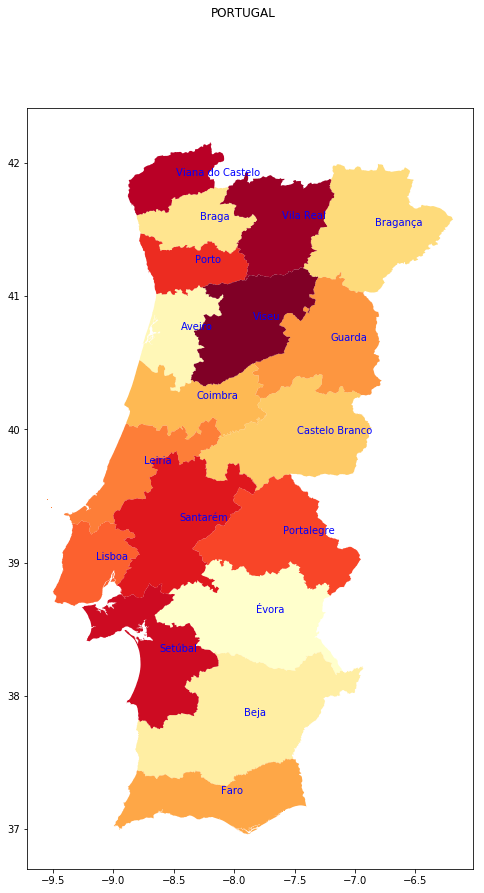

In [14]:
# PLOT Distrits points
f, ax = plt.subplots(1, figsize=(8,14))
ax.set_axis_on()
f.suptitle('PORTUGAL')
# Plot the states area
ax = uf_pt2x.plot(ax=ax, facecolor='blue', alpha=1, linewidth=0, cmap='YlOrRd')

# Plot the labels 
for x, y, label in zip(points.geometry.x, points.geometry.y, points.NAME_1):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), alpha=3, textcoords="offset points",color='blue')

In [15]:
uf_pt3x[uf_pt3x.NAME_1  == 'Porto'].head(20)


,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
208,182,PRT,Portugal,15,Porto,207,Amarante,PT.PO.AM,0,1301,Concelho,Municipality,None,None,POLYGON ((-7.972868919372559 41.36389541625971...
209,182,PRT,Portugal,15,Porto,208,Baião,PT.PO.BA,0,1302,Concelho,Municipality,None,None,POLYGON ((-7.884912014007568 41.24785995483404...
210,182,PRT,Portugal,15,Porto,209,Felgueiras,PT.PO.FE,0,1303,Concelho,Municipality,None,None,"POLYGON ((-8.20706844329834 41.4108161926269, ..."
211,182,PRT,Portugal,15,Porto,210,Gondomar,PT.PO.GO,0,1304,Concelho,Municipality,None,None,"POLYGON ((-8.52708625793457 41.20302581787109,..."
212,182,PRT,Portugal,15,Porto,211,Lousada,PT.PO.LO,0,1305,Concelho,Municipality,None,None,POLYGON ((-8.316142082214242 41.35116195678711...
213,182,PRT,Portugal,15,Porto,212,Maia,PT.PO.MI,0,1306,Concelho,Municipality,None,None,POLYGON ((-8.621764183044377 41.29537200927734...
214,182,PRT,Portugal,15,Porto,213,Marco de Canaveses,PT.PO.MC,0,1307,Concelho,Municipality,None,None,POLYGON ((-8.137008666992188 41.25824737548834...
215,182,PRT,Portugal,15,Porto,214,Matosinhos,PT.PO.MT,0,1308,Concelho,Municipality,None,None,POLYGON ((-8.704297065734863 41.27227020263689...
216,182,PRT,Portugal,15,Porto,215,Póvoa de Varzim,PT.PO.PV,0,1313,Concelho,Municipality,None,None,POLYGON ((-8.758174896240178 41.46694183349638...
217,182,PRT,Portugal,15,Porto,216,Paços de Ferreira,PT.PO.PF,0,1309,Concelho,Municipality,None,None,POLYGON ((-8.378033638000488 41.33587646484381...


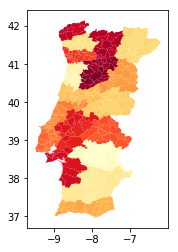

In [16]:
# Concelhos
uf_pt3x.plot(cmap='YlOrRd')

In [17]:
# Transform POLYGON to POINT
# copy poly to new GeoDataFrame
points2 = concelhos_with_distritos.copy()
# change the geometry
points2.geometry = points2['geometry'].centroid
# same crs
#points.crs = poly.crs
points2.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,POINT (-7.870227820320782 38.53313641008285)
1,182,PRT,Portugal,1,Évora,2,Alandroal,PT.EV.AL,0,0701,Concelho,Municipality,None,None,POINT (-7.382903542244738 38.61577024923209)
2,182,PRT,Portugal,1,Évora,3,Arraiolos,PT.EV.AR,0,0702,Concelho,Municipality,None,None,POINT (-7.916383299756945 38.78675043453124)
3,182,PRT,Portugal,1,Évora,4,Borba,PT.EV.BO,0,0703,Concelho,Municipality,None,None,POINT (-7.469354864742858 38.81652498686883)
4,182,PRT,Portugal,1,Évora,5,Estremoz,PT.EV.ES,0,0704,Concelho,Municipality,None,None,POINT (-7.613682412971558 38.84545338913198)


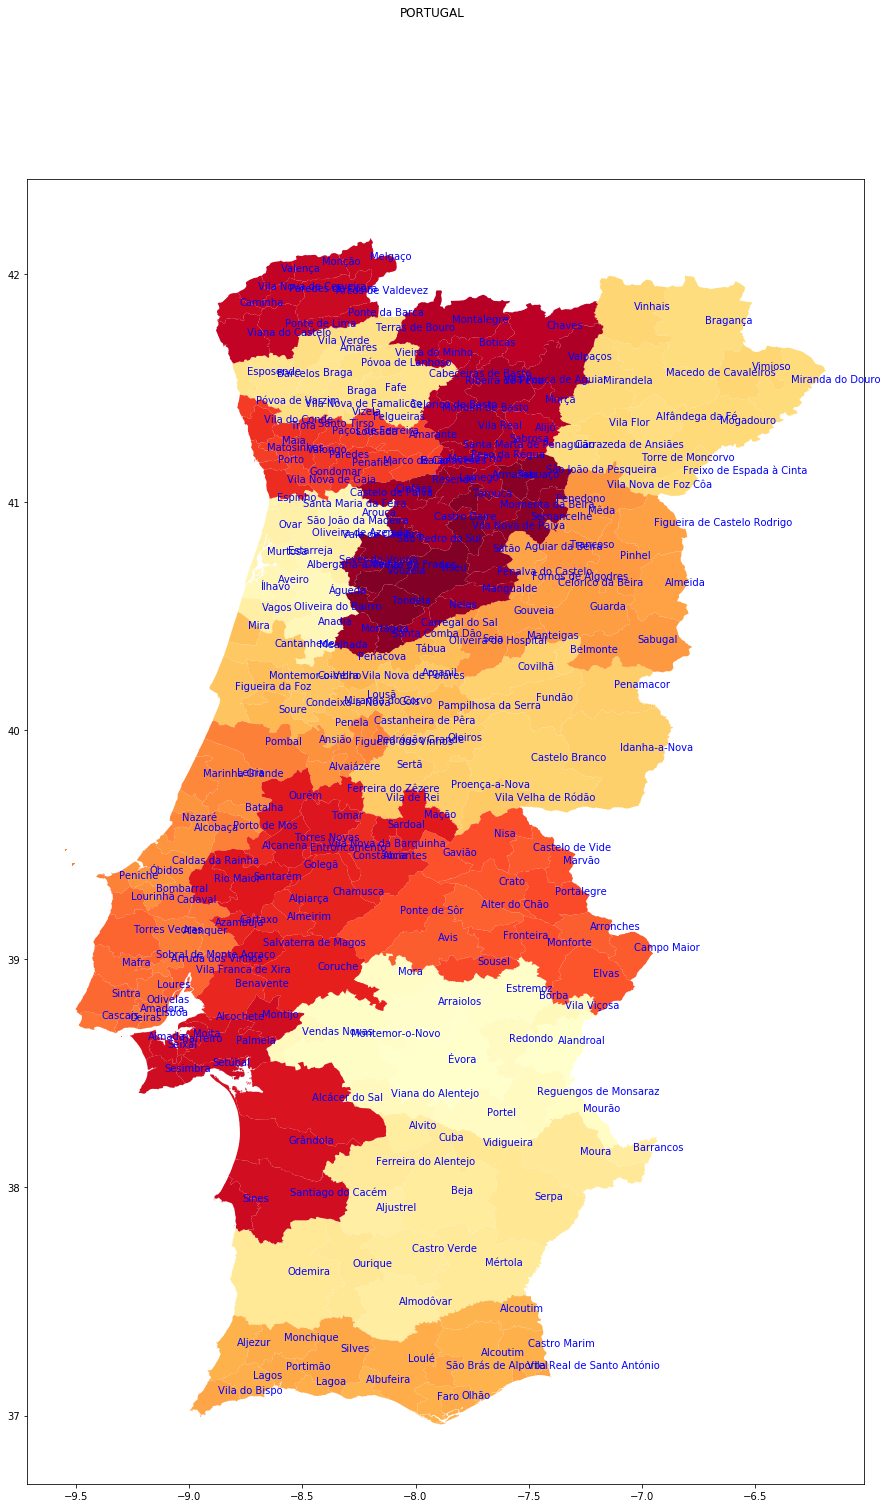

In [18]:
# PLOT Concelhos points
f, ax = plt.subplots(1, figsize=(15,24))
ax.set_axis_on()
f.suptitle('PORTUGAL')
# Plot the states area
ax = concelhos_with_distritos.plot(ax=ax, facecolor='blue', alpha=1, linewidth=0, cmap='YlOrRd')

# Plot the labels 
for x, y, label in zip(points2.geometry.x, points2.geometry.y, points2.NAME_2):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), alpha=3, textcoords="offset points",color='blue')

## Tabela com população de Portugal por Distrito / Concelho /Freguesia - Censos 2010
 https://www.portugal2020.pt/Portal2020/canal-2020
    
Arquivo:  PopulacaoResidentePSexoGruposEtarios2010.xls

In [19]:
import pandas as pd
import numpy as np

In [20]:
path = 'ML/GeoPandas/Portugal/'
path

'ML/GeoPandas/Portugal/'

In [21]:
# Read table about Portugal population
 
df0 = pd.read_excel(path +'PopulacaoResidentePSexoGruposEtarios2010.xls')

In [22]:
df0.head()

,"NUTS I, II e III e Municípios (NUTS 2002)",Género,Grupos etários - TOTAL,Grupos etários - 0 - 4,Grupos etários - 5 - 9,Grupos etários - 10 - 14,Grupos etários - 15-19,Grupos etários - 20-24,Grupos etários - 25-29,Grupos etários - 30-34,...,Grupos etários - 40-44,Grupos etários - 45-49,Grupos etários - 50-54,Grupos etários - 55-59,Grupos etários - 60-64,Grupos etários - 65-69,Grupos etários - 70-74,Grupos etários - 75-79,Grupos etários - 80-84,Grupos etários - 85+
0,Portugal,HM,10 572 157,483 751,528 150,563 999,566 908,581 782,659 248,779 416,...,772 728,769 787,721 068,675 431,632 234,549 609,501 128,430 144,297 317,236 664
1,Portugal,H,5 054 330,246 975,270 450,288 429,289 249,293 007,326 559,381 709,...,374 955,370 985,345 966,321 316,297 299,252 080,223 009,180 354,113 069,77 179
2,Portugal,M,5 517 827,236 776,257 700,275 570,277 659,288 775,332 689,397 707,...,397 773,398 802,375 102,354 115,334 935,297 529,278 119,249 790,184 248,159 485
3,Continente,HM,10 057 380,457 458,498 402,531 617,533 132,547 700,622 885,737 978,...,733 583,730 293,686 841,646 213,607 961,528 928,482 958,414 149,287 127,228 804
4,Continente,H,4 806 367,233 515,255 260,271 840,272 047,275 632,308 312,361 013,...,355 420,351 652,329 401,307 064,286 194,243 201,215 810,174 433,109 672,74 868


In [23]:
# Read table about Portuguese population

df1 = pd.read_excel(path +'Censos2011_Pop_Freguesias.xls')

In [24]:
df1.head(10)

,Fonte: CENSOS 2011 - Instituto Nacional de Estatistica,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,CAOP 2013 - Carta Administrativa Oficial Portu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Distrito (DT),Designação DT,Concelho (CC),Designação CC,Freguesia (FR),Designação FR,PopRes_2011 (nº),Rural,Litorâneo
3,'01',Aveiro,'0101',Águeda,'010103',Aguada de Cima,4013,S,NaN
4,'01',Aveiro,'0101',Águeda,'010109',Fermentelos,3258,S,NaN
5,'01',Aveiro,'0101',Águeda,'010112',Macinhata do Vouga,3406,S,NaN
6,'01',Aveiro,'0101',Águeda,'010119',Valongo do Vouga,4877,S,NaN
7,'01',Aveiro,'0101',Águeda,'010121',União das freguesias de Águeda e Borralha,13576,S,NaN
8,'01',Aveiro,'0101',Águeda,'010122',União das freguesias de Barrô e Aguada de Baixo,3209,S,NaN
9,'01',Aveiro,'0101',Águeda,'010123',"União das freguesias de Belazaima do Chão, Cas...",1611,S,NaN


In [25]:
# Rename columns
names = df1.columns.tolist()
names[names.index('Unnamed: 1')] = 'Distrito'
names[names.index('Unnamed: 3')] = 'Concelho'
names[names.index('Unnamed: 5')] = 'Freguesia'
names[names.index('Unnamed: 6')] = 'Num_Residentes'
df1.columns = names

In [26]:
df1.head()

,Fonte: CENSOS 2011 - Instituto Nacional de Estatistica,Distrito,Unnamed: 2,Concelho,Unnamed: 4,Freguesia,Num_Residentes,Unnamed: 7,Unnamed: 8
0,CAOP 2013 - Carta Administrativa Oficial Portu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Distrito (DT),Designação DT,Concelho (CC),Designação CC,Freguesia (FR),Designação FR,PopRes_2011 (nº),Rural,Litorâneo
3,'01',Aveiro,'0101',Águeda,'010103',Aguada de Cima,4013,S,NaN
4,'01',Aveiro,'0101',Águeda,'010109',Fermentelos,3258,S,NaN


In [27]:
# See lines and columns
df1.shape

(2885, 9)

In [28]:
# New table with the relevant informations
df1_x = df1[['Distrito','Concelho','Freguesia','Num_Residentes']]

In [29]:
# Delete firts 3 lines, not relevants
df1_x1 = df1_x.copy()
df1_x1.drop([0,1,2], axis='rows', inplace=True)
df1_x1.head()

,Distrito,Concelho,Freguesia,Num_Residentes
3,Aveiro,Águeda,Aguada de Cima,4013
4,Aveiro,Águeda,Fermentelos,3258
5,Aveiro,Águeda,Macinhata do Vouga,3406
6,Aveiro,Águeda,Valongo do Vouga,4877
7,Aveiro,Águeda,União das freguesias de Águeda e Borralha,13576


In [30]:
df1_x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2882 entries, 3 to 2884
Data columns (total 4 columns):
Distrito          2882 non-null object
Concelho          2882 non-null object
Freguesia         2882 non-null object
Num_Residentes    2882 non-null object
dtypes: object(4)
memory usage: 112.6+ KB


In [31]:
# Transform type to Num_Residente from object to int
df1_x1['Num_Residentes'] = df1_x1['Num_Residentes'].astype(float)

In [32]:
df1_x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2882 entries, 3 to 2884
Data columns (total 4 columns):
Distrito          2882 non-null object
Concelho          2882 non-null object
Freguesia         2882 non-null object
Num_Residentes    2882 non-null float64
dtypes: float64(1), object(3)
memory usage: 112.6+ KB


In [33]:
# Sum table by Distrito
df1_x2 = df1_x1.groupby('Distrito')['Num_Residentes'].sum() 
# Transform table pandas
s_table = pd.DataFrame(df1_x2)
# Rename columns
s_table.columns = ['Num_Residentes']
s_table = s_table.sort_values(by=['Num_Residentes'],ascending=False)

In [34]:
s_table

,Num_Residentes
Distrito,
Lisboa,2250533.0
Porto,1817175.0
Setúbal,851258.0
Braga,848185.0
Aveiro,714197.0
Leiria,470922.0
Santarém,453646.0
Faro,451006.0
Coimbra,430104.0


In [35]:
# Total population
Tot_population = s_table['Num_Residentes'].sum()
print ('Numero Residentes em Portugal(Censos 2011):', Tot_population)

Numero Residentes em Portugal(Censos 2011): 10047621.0


In [36]:
# Create % from populatio by district
if (s_table['Num_Residentes'].empty) != True:
    s_table['Perc_Population'] = round(100*(s_table['Num_Residentes'] / Tot_population),2)
else:
    s_table['Perc_Population'] = 0

s_table

,Num_Residentes,Perc_Population
Distrito,,
Lisboa,2250533.0,22.40
Porto,1817175.0,18.09
Setúbal,851258.0,8.47
Braga,848185.0,8.44
Aveiro,714197.0,7.11
Leiria,470922.0,4.69
Santarém,453646.0,4.51
Faro,451006.0,4.49
Coimbra,430104.0,4.28


In [37]:
df = s_table.copy()
#del df['Perc_Population']

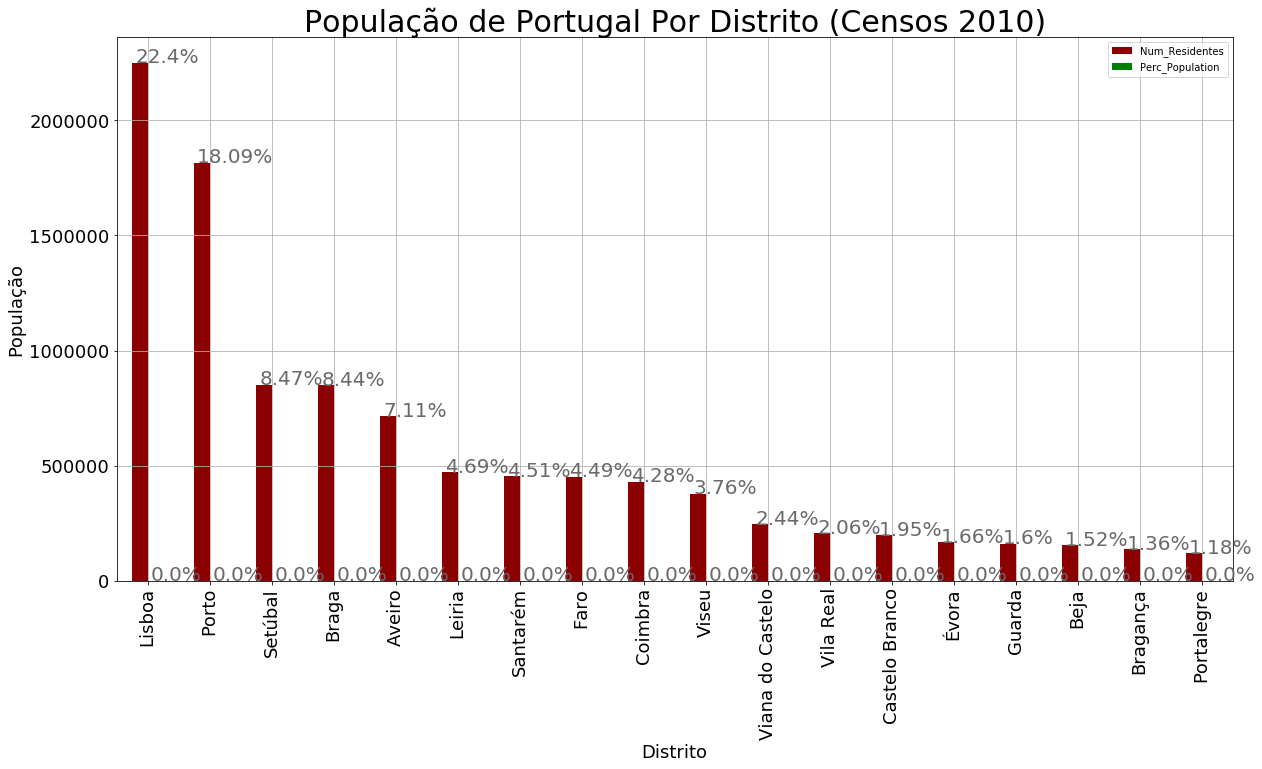

In [38]:
# Plot a bar graphic
ax = df.plot( kind='bar', figsize=(20,10), grid=True, color=('darkred','Green'),fontsize=18)
plt.title('População de Portugal Por Distrito (Censos 2010)',fontsize=30)
plt.xlabel('Distrito',fontsize=18)
plt.ylabel('População',fontsize=18)

# ----
# Create % to the graph
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list (porcentagem )
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.05, i.get_height()+.02, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=20,
                color='dimgrey')
# set individual bar lables using above list (Valor)
#for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
#    ax.text(i.get_x()+.07, i.get_height()+20, \
#            str(round((i.get_height()), 10)), fontsize=12, color='dimgrey',
#                rotation=45)
plt.savefig('Populacao por distrito 1')
plt.show()

In [39]:
# Merge tables Districts with Geo Spacial
# Distritos
uf_pt2x.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,182,PRT,Portugal,1,Évora,PT.EV,0,None,Distrito,District,None,None,"POLYGON ((-8.14205360412592 39.01528930664063,..."
1,182,PRT,Portugal,2,Aveiro,PT.AV,0,01,Distrito,District,None,None,(POLYGON ((-8.682082176208496 40.6945838928223...
3,182,PRT,Portugal,4,Beja,PT.BE,0,02,Distrito,District,None,None,(POLYGON ((-8.79263782501215 37.71875000000006...
4,182,PRT,Portugal,5,Braga,PT.BR,0,03,Distrito,District,None,None,POLYGON ((-8.049615859985352 41.81636047363293...
5,182,PRT,Portugal,6,Bragança,PT.BA,0,04,Distrito,District,None,Braganza,"POLYGON ((-6.799950122833252 41.9891471862793,..."


In [40]:
# Rename columns
names = uf_pt2x.columns.tolist()
names[names.index('NAME_1')] = 'Distrito'
uf_pt2x.columns = names

In [41]:
uf_pt2x.head()

,ID_0,ISO,NAME_0,ID_1,Distrito,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,182,PRT,Portugal,1,Évora,PT.EV,0,None,Distrito,District,None,None,"POLYGON ((-8.14205360412592 39.01528930664063,..."
1,182,PRT,Portugal,2,Aveiro,PT.AV,0,01,Distrito,District,None,None,(POLYGON ((-8.682082176208496 40.6945838928223...
3,182,PRT,Portugal,4,Beja,PT.BE,0,02,Distrito,District,None,None,(POLYGON ((-8.79263782501215 37.71875000000006...
4,182,PRT,Portugal,5,Braga,PT.BR,0,03,Distrito,District,None,None,POLYGON ((-8.049615859985352 41.81636047363293...
5,182,PRT,Portugal,6,Bragança,PT.BA,0,04,Distrito,District,None,Braganza,"POLYGON ((-6.799950122833252 41.9891471862793,..."


In [42]:
# Merge two tables by Distrito
result = pd.merge(uf_pt2x, df, on='Distrito')

In [43]:
result.head()

,ID_0,ISO,NAME_0,ID_1,Distrito,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,Num_Residentes,Perc_Population
0,182,PRT,Portugal,1,Évora,PT.EV,0,None,Distrito,District,None,None,"POLYGON ((-8.14205360412592 39.01528930664063,...",166726.0,1.66
1,182,PRT,Portugal,2,Aveiro,PT.AV,0,01,Distrito,District,None,None,(POLYGON ((-8.682082176208496 40.6945838928223...,714197.0,7.11
2,182,PRT,Portugal,4,Beja,PT.BE,0,02,Distrito,District,None,None,(POLYGON ((-8.79263782501215 37.71875000000006...,152758.0,1.52
3,182,PRT,Portugal,5,Braga,PT.BR,0,03,Distrito,District,None,None,POLYGON ((-8.049615859985352 41.81636047363293...,848185.0,8.44
4,182,PRT,Portugal,6,Bragança,PT.BA,0,04,Distrito,District,None,Braganza,"POLYGON ((-6.799950122833252 41.9891471862793,...",136252.0,1.36


In [44]:
# Sotr Table descending by number population
result = result.sort_values(by=['Num_Residentes'],ascending=False)

In [45]:
# result[result.Distrito  == 'Porto'].head(20)
result.head()

,ID_0,ISO,NAME_0,ID_1,Distrito,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,Num_Residentes,Perc_Population
10,182,PRT,Portugal,12,Lisboa,PT.LI,0,None,Distrito,District,None,Lisbon|Lisbona|Lisbonne|Lissabon,(POLYGON ((-9.299028396606445 38.6618041992188...,2250533.0,22.40
12,182,PRT,Portugal,15,Porto,PT.PO,0,None,Distrito,District,None,Oporto,(POLYGON ((-8.68626880645752 41.16044998168951...,1817175.0,18.09
14,182,PRT,Portugal,17,Setúbal,PT.SE,0,None,Distrito,District,None,None,(POLYGON ((-8.796740531921387 37.8342247009277...,851258.0,8.47
3,182,PRT,Portugal,5,Braga,PT.BR,0,03,Distrito,District,None,None,POLYGON ((-8.049615859985352 41.81636047363293...,848185.0,8.44
1,182,PRT,Portugal,2,Aveiro,PT.AV,0,01,Distrito,District,None,None,(POLYGON ((-8.682082176208496 40.6945838928223...,714197.0,7.11


In [46]:
# Make new index resulting new sort values
result.reset_index()

,index,ID_0,ISO,NAME_0,ID_1,Distrito,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,Num_Residentes,Perc_Population
0,10,182,PRT,Portugal,12,Lisboa,PT.LI,0,None,Distrito,District,None,Lisbon|Lisbona|Lisbonne|Lissabon,(POLYGON ((-9.299028396606445 38.6618041992188...,2250533.0,22.40
1,12,182,PRT,Portugal,15,Porto,PT.PO,0,None,Distrito,District,None,Oporto,(POLYGON ((-8.68626880645752 41.16044998168951...,1817175.0,18.09
2,14,182,PRT,Portugal,17,Setúbal,PT.SE,0,None,Distrito,District,None,None,(POLYGON ((-8.796740531921387 37.8342247009277...,851258.0,8.47
3,3,182,PRT,Portugal,5,Braga,PT.BR,0,03,Distrito,District,None,None,POLYGON ((-8.049615859985352 41.81636047363293...,848185.0,8.44
4,1,182,PRT,Portugal,2,Aveiro,PT.AV,0,01,Distrito,District,None,None,(POLYGON ((-8.682082176208496 40.6945838928223...,714197.0,7.11
5,9,182,PRT,Portugal,11,Leiria,PT.LE,0,None,Distrito,District,None,None,(POLYGON ((-9.505970954894963 39.4218063354492...,470922.0,4.69
6,13,182,PRT,Portugal,16,Santarém,PT.SA,0,None,Distrito,District,None,None,(POLYGON ((-8.939861297607365 38.7845840454102...,453646.0,4.51
7,7,182,PRT,Portugal,9,Faro,PT.FA,0,08,Distrito,District,None,None,(POLYGON ((-7.880416870117131 36.9734725952148...,451006.0,4.49
8,6,182,PRT,Portugal,8,Coimbra,PT.CO,0,06,Distrito,District,None,None,POLYGON ((-8.719038009643498 40.47155380249029...,430104.0,4.28
9,17,182,PRT,Portugal,20,Viseu,PT.VI,0,None,Distrito,District,None,Vizeu,POLYGON ((-7.398531913757324 41.19854354858398...,377653.0,3.76


In [47]:
#https://matplotlib.org/examples/color/named_colors.html

# List of colors
color_list = ['red', 'tomato', 'darkorange', 'magenta','deepskyblue','plum', 
              'cyan', 'lightsalmon','palegreen','wheat','silver','seashell', 
              'linen','aliceblue','azure','mintcream', 'oldlace', 
              'floralwhite','honeydew','cornsilk','lightyellow','whitesmoke',
              'lavender','lightcyan','white','ghostwhite','snow',
              'oldlace','oldlace','oldlace','oldlace']
      
#color_list

In [48]:
# Transform POLYGON to POINT
# copy poly to new GeoDataFrame
points = result.copy()
# change the geometry
points.geometry = points['geometry'].centroid
# same crs
#points.crs = poly.crs
points.head()

,ID_0,ISO,NAME_0,ID_1,Distrito,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,Num_Residentes,Perc_Population
10,182,PRT,Portugal,12,Lisboa,PT.LI,0,None,Distrito,District,None,Lisbon|Lisbona|Lisbonne|Lissabon,POINT (-9.165744384915051 39.00031299586787),2250533.0,22.40
12,182,PRT,Portugal,15,Porto,PT.PO,0,None,Distrito,District,None,Oporto,POINT (-8.352363615311283 41.22466746446678),1817175.0,18.09
14,182,PRT,Portugal,17,Setúbal,PT.SE,0,None,Distrito,District,None,None,POINT (-8.64485258785092 38.30976012126702),851258.0,8.47
3,182,PRT,Portugal,5,Braga,PT.BR,0,03,Distrito,District,None,None,POINT (-8.309432985526078 41.55295905761618),848185.0,8.44
1,182,PRT,Portugal,2,Aveiro,PT.AV,0,01,Distrito,District,None,None,POINT (-8.464918562075658 40.72356219053533),714197.0,7.11


In [49]:
x1_table = result.copy().reset_index()
x1_table.head()

,index,ID_0,ISO,NAME_0,ID_1,Distrito,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,Num_Residentes,Perc_Population
0,10,182,PRT,Portugal,12,Lisboa,PT.LI,0,None,Distrito,District,None,Lisbon|Lisbona|Lisbonne|Lissabon,(POLYGON ((-9.299028396606445 38.6618041992188...,2250533.0,22.40
1,12,182,PRT,Portugal,15,Porto,PT.PO,0,None,Distrito,District,None,Oporto,(POLYGON ((-8.68626880645752 41.16044998168951...,1817175.0,18.09
2,14,182,PRT,Portugal,17,Setúbal,PT.SE,0,None,Distrito,District,None,None,(POLYGON ((-8.796740531921387 37.8342247009277...,851258.0,8.47
3,3,182,PRT,Portugal,5,Braga,PT.BR,0,03,Distrito,District,None,None,POLYGON ((-8.049615859985352 41.81636047363293...,848185.0,8.44
4,1,182,PRT,Portugal,2,Aveiro,PT.AV,0,01,Distrito,District,None,None,(POLYGON ((-8.682082176208496 40.6945838928223...,714197.0,7.11


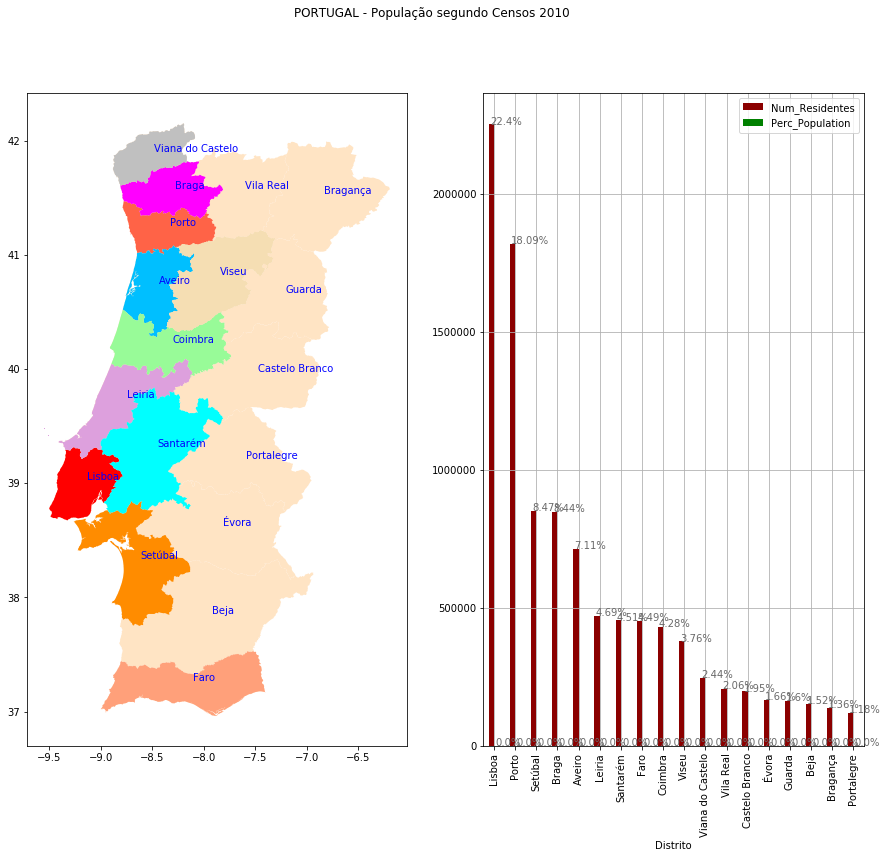

In [50]:
# Plot two Graphs

# Defining two area to plot
f, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(15,12))
ax1.set_axis_on()
f.suptitle('PORTUGAL - População segundo Censos 2010')

#-- First Graph ----- Colored by greatest Number
# PLOT State points
# Plot the states area  
ax1 = x1_table.plot(ax=ax1, facecolor='blue', alpha=1, linewidth=3, color = 'bisque') # cmap='YlOrRd')    cmap=plt.cm.rainbow
# 1 registo
ax1 = x1_table[x1_table.index == 0].plot(ax=ax1,  alpha=1, linewidth=1, color=color_list[0])
# 2 registo
ax1 = x1_table[x1_table.index == 1].plot(ax=ax1,  alpha=1, linewidth=1, color=color_list[1])
# 3 registo
ax1 = x1_table[x1_table.index == 2].plot(ax=ax1,  alpha=1, linewidth=1, color=color_list[2])
# 4 registo
ax1 = x1_table[x1_table.index == 3].plot(ax=ax1,  alpha=1, linewidth=1, color=color_list[3])
# 5 registo
ax1 = x1_table[x1_table.index == 4].plot(ax=ax1,  alpha=1, linewidth=1, color=color_list[4])
# 6 registo
ax1 = x1_table[x1_table.index == 5].plot(ax=ax1,  alpha=1, linewidth=1, color=color_list[5])
# 7 registo
ax1 = x1_table[x1_table.index == 6].plot(ax=ax1,  alpha=1, linewidth=1, color=color_list[6])
# 8 registo
ax1 = x1_table[x1_table.index == 7].plot(ax=ax1,  alpha=1, linewidth=1, color=color_list[7])
# 9 registo
ax1 = x1_table[x1_table.index == 8].plot(ax=ax1,  alpha=1, linewidth=1, color=color_list[8])
# 10 registo
ax1 = x1_table[x1_table.index == 9].plot(ax=ax1,  alpha=1, linewidth=1, color=color_list[9])
# 10 registo
ax1 = x1_table[x1_table.index == 10].plot(ax=ax1,  alpha=1, linewidth=1, color=color_list[10])

# Plot the labels 
for x, y, label in zip(points.geometry.x, points.geometry.y, points.Distrito):
    ax1.annotate(label, xy=(x, y), xytext=(3, 3), alpha=3, textcoords="offset points",color='blue')

# ---  Second Graf -----
df = s_table
ax2.set_axis_on()
df.plot(ax=ax2, kind='bar', grid=True, color=('darkred','Green'),fontsize=10)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax2.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list (porcentagem )
for i in ax2.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax2.text(i.get_x()+.05, i.get_height()+.02, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='dimgrey')

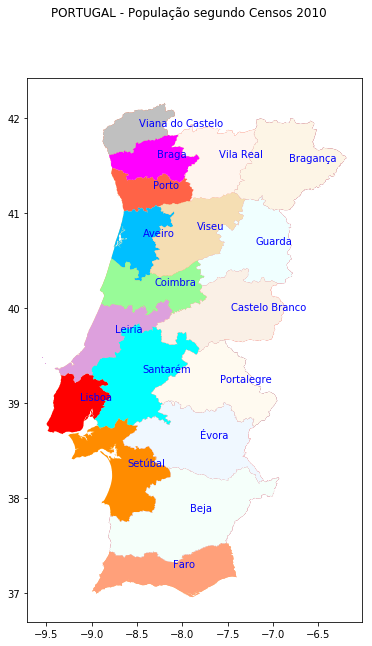

In [51]:
# PLOT State points
f, ax = plt.subplots(1, figsize=(6,10))
ax.set_axis_on()
f.suptitle('PORTUGAL - População segundo Censos 2010')

# Plot the states area  
nrof_labels = len(x1_table)
# Plot all the map
ax = x1_table.plot(ax=ax, facecolor='blue', alpha=1, linewidth=0, cmap='YlOrRd', legend = True)   # cmap=plt.cm.rainbow

# Aplicar cor na regiao de acordo com o maior numero  
for i,c in enumerate(x1_table.Distrito):
    # Plot a UF map
    ax = x1_table[x1_table.index == i].plot(ax=ax,  facecolor='blue', alpha=1, linewidth=0, color=color_list[i])

# Plot the labels 
for x, y, label in zip(points.geometry.x, points.geometry.y, points.Distrito):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), alpha=3, textcoords="offset points",color='blue')

## PORTUGAL - Roads ,Trails and Rail Roads

In [154]:
# Tables Portugal - Roads and Trails
rds_pt1 = gpd.read_file(path + 'PRT_rds/PRT_roads.shp')
# Rail Road
rds_pt2 = gpd.read_file(path + 'PRT_rrd/PRT_rails.shp')
# Water
rds_pt3 = gpd.read_file(path + 'PRT_WATER/waterways.shp')

In [123]:
rds_pt1.head()

,MED_DESCRI,RTT_DESCRI,F_CODE_DES,ISO,ISOCOUNTRY,geometry
0,Without Median,Secondary Route,Road,PRT,PORTUGAL,(LINESTRING (-8.228926550614217 42.13301116472...
1,Without Median,Secondary Route,Road,PRT,PORTUGAL,LINESTRING (-8.589778012939519 42.048389438887...
2,Without Median,Secondary Route,Road,PRT,PORTUGAL,LINESTRING (-8.589778012939519 42.048389438887...
3,Without Median,Secondary Route,Road,PRT,PORTUGAL,LINESTRING (-8.633639242857511 42.028831529923...
4,Without Median,Primary Route,Road,PRT,PORTUGAL,LINESTRING (-8.633639242857511 42.028831529923...


In [124]:
# Rail Road
rds_pt2.head()

,FID_rail_d,F_CODE_DES,EXS_DESCRI,FCO_DESCRI,FID_countr,ISO,ISOCOUNTRY,geometry
0,96319,Railroad,Operational,Single,179,PRT,PORTUGAL,LINESTRING (-8.480833136999998 42.076667815473...
1,96485,Railroad,Operational,Single,179,PRT,PORTUGAL,LINESTRING (-8.632008566999998 42.031692430473...
2,96497,Railroad,Operational,Single,179,PRT,PORTUGAL,LINESTRING (-8.632008566999998 42.031692430473...
3,97844,Railroad,Operational,Single,179,PRT,PORTUGAL,LINESTRING (-6.761750183999998 41.801334316473...
4,98035,Railroad,Operational,Single,179,PRT,PORTUGAL,LINESTRING (-8.583110864999998 41.771640715473...


In [125]:
# Only roads
rds_roads = rds_pt1[rds_pt1.F_CODE_DES == 'Road']
rds_roads.head()

,MED_DESCRI,RTT_DESCRI,F_CODE_DES,ISO,ISOCOUNTRY,geometry
0,Without Median,Secondary Route,Road,PRT,PORTUGAL,(LINESTRING (-8.228926550614217 42.13301116472...
1,Without Median,Secondary Route,Road,PRT,PORTUGAL,LINESTRING (-8.589778012939519 42.048389438887...
2,Without Median,Secondary Route,Road,PRT,PORTUGAL,LINESTRING (-8.589778012939519 42.048389438887...
3,Without Median,Secondary Route,Road,PRT,PORTUGAL,LINESTRING (-8.633639242857511 42.028831529923...
4,Without Median,Primary Route,Road,PRT,PORTUGAL,LINESTRING (-8.633639242857511 42.028831529923...


In [126]:
# Only trails
rds_trail = rds_pt1[rds_pt1.F_CODE_DES == 'Trail']
rds_trail.head()

,MED_DESCRI,RTT_DESCRI,F_CODE_DES,ISO,ISOCOUNTRY,geometry
281,None,None,Trail,PRT,PORTUGAL,(LINESTRING (-31.09302706086433 39.71252823725...
296,None,None,Trail,PRT,PORTUGAL,(LINESTRING (-31.214077969638 39.5237503126078...
304,None,None,Trail,PRT,PORTUGAL,LINESTRING (-31.19605644167169 39.441249922762...
308,None,None,Trail,PRT,PORTUGAL,LINESTRING (-31.23966592359016 39.426807487789...
309,None,None,Trail,PRT,PORTUGAL,LINESTRING (-31.25744439755691 39.458946181728...


In [169]:
rds_pt3.head()

,osm_id,name,type,width,geometry
0,4718597,None,river,0,"LINESTRING (-8.490691699999999 38.9709642, -8...."
1,4856704,Rio Varosa,stream,0,"LINESTRING (-7.820399 40.964353, -7.819519 40...."
2,10577666,None,stream,0,"LINESTRING (-6.8283313 41.297276, -6.8284171 4..."
3,12641715,None,river,0,"LINESTRING (-8.8354898 39.0048754, -8.83484600..."
4,12641805,None,river,0,"LINESTRING (-8.8395753 39.0185739, -8.83923200..."


In [174]:
# Rename columns
names = rds_pt3.columns.tolist()
names[names.index('type')] = 'tipo'
rds_pt3.columns = names

In [175]:
#List unique values in the df['name'] column
rds_pt3.tipo.unique()

array(['river', 'stream', 'weir', 'dock', 'dam', 'canal'], dtype=object)

In [176]:
# Rivers
rds_pt3[rds_pt3.tipo == 'river'].head()


,osm_id,name,tipo,width,geometry
0,4718597,None,river,0,"LINESTRING (-8.490691699999999 38.9709642, -8...."
3,12641715,None,river,0,"LINESTRING (-8.8354898 39.0048754, -8.83484600..."
4,12641805,None,river,0,"LINESTRING (-8.8395753 39.0185739, -8.83923200..."
5,23102773,Rio Ceira,river,0,"LINESTRING (-8.394681500000001 40.1725883, -8...."
6,23109746,Rio Ceira,river,0,"LINESTRING (-8.325596000000001 40.174491, -8.3..."


In [180]:
rivers = rds_pt3[rds_pt3.tipo == 'river']
rivers.head()

,osm_id,name,tipo,width,geometry
0,4718597,None,river,0,"LINESTRING (-8.490691699999999 38.9709642, -8...."
3,12641715,None,river,0,"LINESTRING (-8.8354898 39.0048754, -8.83484600..."
4,12641805,None,river,0,"LINESTRING (-8.8395753 39.0185739, -8.83923200..."
5,23102773,Rio Ceira,river,0,"LINESTRING (-8.394681500000001 40.1725883, -8...."
6,23109746,Rio Ceira,river,0,"LINESTRING (-8.325596000000001 40.174491, -8.3..."


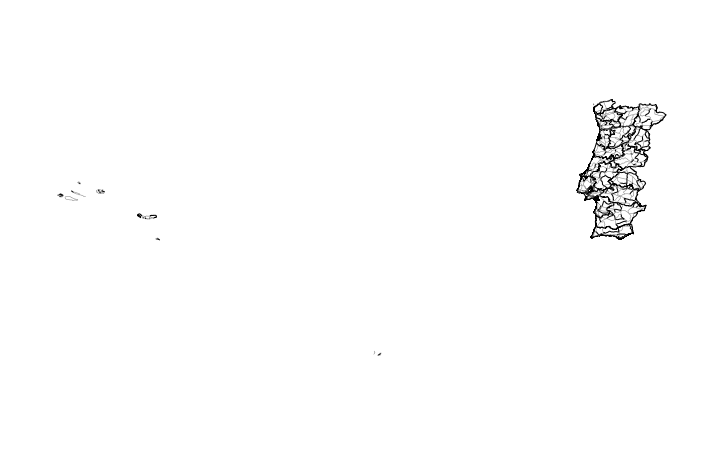

In [127]:
# plotting using geopandas
country_boundary = x1_table
roads_only =  rds_roads

road_colors = ['black', 'grey', 'grey', 'black', 'grey', 'grey' ]
line_widths = [1, .5, .5, 1, .5,.5]

# plot the data
fig, ax = plt.subplots(figsize  = (12, 8))
country_boundary.plot(alpha = 1, color="white", 
                       edgecolor = "black", 
                       ax = ax)
roads_only.plot(ax=ax,  
                   color = road_colors, 
                   linewidth = line_widths,
                   legend = True)
ax.set_axis_off()
plt.axis('equal');

In [128]:
#List unique values in the df['name'] column
rds_pt1.F_CODE_DES.unique()

array(['Road', 'Trail'], dtype=object)

In [129]:
#List unique values in the df['name'] column
rds_pt1.ISOCOUNTRY.unique()

array(['PORTUGAL', None], dtype=object)

In [130]:
rds_pt1[rds_pt1.ISOCOUNTRY != 'PORTUGAL'].head()

,MED_DESCRI,RTT_DESCRI,F_CODE_DES,ISO,ISOCOUNTRY,geometry
713,None,None,Trail,PRT,None,(LINESTRING (-31.08208269599999 39.70749319765...
714,None,None,Trail,PRT,None,(LINESTRING (-31.21934678099999 39.52097325565...
715,Without Median,Secondary Route,Road,PRT,None,LINESTRING (-9.354093461999998 39.348124061650...
716,Without Median,Secondary Route,Road,PRT,None,LINESTRING (-28.01351422799999 39.026527331650...
717,Without Median,Primary Route,Road,PRT,None,LINESTRING (-8.967597344999998 38.955386219650...


In [131]:
#List unique values in the df['name'] column
rds_pt1.RTT_DESCRI.unique()

array(['Secondary Route', 'Primary Route', 'Unknown', None], dtype=object)

In [132]:
rds_pt2 = rds_pt1[rds_pt1.ISOCOUNTRY == 'PORTUGAL']

In [133]:
rds_pt2.head()

,MED_DESCRI,RTT_DESCRI,F_CODE_DES,ISO,ISOCOUNTRY,geometry
0,Without Median,Secondary Route,Road,PRT,PORTUGAL,(LINESTRING (-8.228926550614217 42.13301116472...
1,Without Median,Secondary Route,Road,PRT,PORTUGAL,LINESTRING (-8.589778012939519 42.048389438887...
2,Without Median,Secondary Route,Road,PRT,PORTUGAL,LINESTRING (-8.589778012939519 42.048389438887...
3,Without Median,Secondary Route,Road,PRT,PORTUGAL,LINESTRING (-8.633639242857511 42.028831529923...
4,Without Median,Primary Route,Road,PRT,PORTUGAL,LINESTRING (-8.633639242857511 42.028831529923...


In [134]:
#https://matplotlib.org/examples/color/named_colors.html

# List of colors
color_roads = ['blue', 'red', 'darkorange', 'magenta','deepskyblue','plum', 
              'cyan', 'lightsalmon','palegreen','wheat','silver','seashell', 
              'linen','aliceblue','azure','mintcream', 'oldlace', 
              'floralwhite','honeydew','cornsilk','lightyellow','whitesmoke',
              'lavender','lightcyan','white','ghostwhite','snow',
              'oldlace','oldlace','oldlace','oldlace']

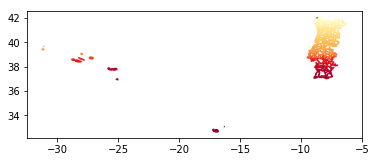

In [135]:
rds_pt2.plot(cmap='YlOrRd')

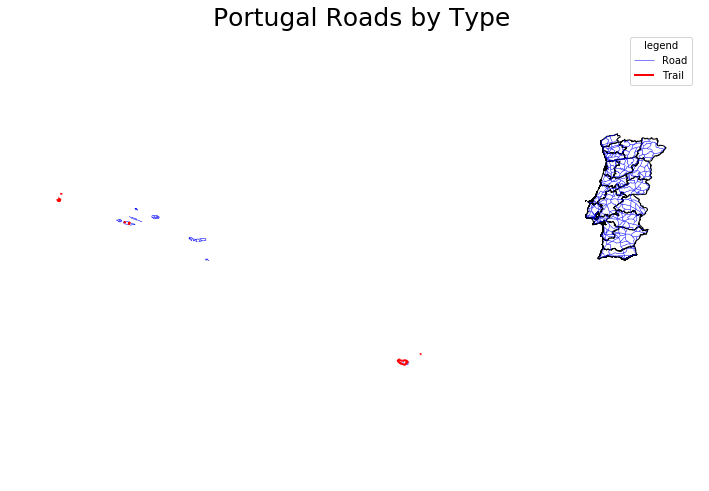

In [136]:
# PLOT The Roads
country_boundary = x1_table
roads_only =  rds_pt2

# make it a bit nicer using a dictionary to assign colors and line widths
road_attrs = { 'Road': ['blue',.5], 
               'Trail': ['red',2]}

# plot the data
fig, ax = plt.subplots(figsize  = (12, 8))

for ctype, data in roads_only.groupby('F_CODE_DES'):
    data.plot(color=road_attrs[ctype][0], 
              label = ctype,
              ax = ax, 
              linewidth=road_attrs[ctype][1])

country_boundary.plot(alpha = 1, color="white", edgecolor = "black", ax = ax)
ax.legend(title="legend")
ax.set_title("Portugal Roads by Type", fontsize=25)
ax.set_axis_off()
plt.axis('equal');

In [137]:
# Reading mapas from Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [138]:
#filtering Europe
world[world.continent == 'Europe'].head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."
12,10414336.0,Europe,Belgium,BEL,389300.0,"POLYGON ((3.314971144228537 51.34578095153609,..."
16,7204687.0,Europe,Bulgaria,BGR,93750.0,"POLYGON ((22.65714969248299 44.23492300066128,..."
18,4613414.0,Europe,Bosnia and Herz.,BIH,29700.0,"POLYGON ((19.00548628101012 44.86023366960916,..."


In [139]:
# Obtain Portugal - Without Acores e Madeira
portugal = world[world.iso_a3 == 'PRT'].head()

In [140]:
portugal


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
130,10707924.0,Europe,Portugal,PRT,208627.0,POLYGON ((-9.034817674180246 41.88057058365968...


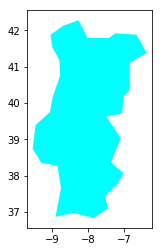

In [141]:
portugal.plot(color='cyan')

In [142]:
# Separate Primary roads
rds_primary = rds_pt1[rds_pt1.RTT_DESCRI == 'Primary Route']

In [143]:
# Separate Secondary roads
rds_secondary = rds_pt1[rds_pt1.RTT_DESCRI == 'Secondary Route']

In [144]:
rds_secondary.head()

,MED_DESCRI,RTT_DESCRI,F_CODE_DES,ISO,ISOCOUNTRY,geometry
0,Without Median,Secondary Route,Road,PRT,PORTUGAL,(LINESTRING (-8.228926550614217 42.13301116472...
1,Without Median,Secondary Route,Road,PRT,PORTUGAL,LINESTRING (-8.589778012939519 42.048389438887...
2,Without Median,Secondary Route,Road,PRT,PORTUGAL,LINESTRING (-8.589778012939519 42.048389438887...
3,Without Median,Secondary Route,Road,PRT,PORTUGAL,LINESTRING (-8.633639242857511 42.028831529923...
6,Without Median,Secondary Route,Road,PRT,PORTUGAL,LINESTRING (-6.860388704173024 41.841915066273...


In [181]:
rivers.head()

,osm_id,name,tipo,width,geometry
0,4718597,None,river,0,"LINESTRING (-8.490691699999999 38.9709642, -8...."
3,12641715,None,river,0,"LINESTRING (-8.8354898 39.0048754, -8.83484600..."
4,12641805,None,river,0,"LINESTRING (-8.8395753 39.0185739, -8.83923200..."
5,23102773,Rio Ceira,river,0,"LINESTRING (-8.394681500000001 40.1725883, -8...."
6,23109746,Rio Ceira,river,0,"LINESTRING (-8.325596000000001 40.174491, -8.3..."


In [224]:
# Main road
line_p_roads = gpd.GeoDataFrame(rds_primary.geometry)
# Secondary road
line_s_roads = gpd.GeoDataFrame(rds_secondary.geometry)
# rail road
lines_rail_roads = gpd.GeoDataFrame(rds_pt2.geometry)
# Rivers
lines_rivers = gpd.GeoDataFrame(rivers)
# All rivers
lines_rivers_all = gpd.GeoDataFrame(rds_pt3)

poly_gdf = gpd.GeoDataFrame(portugal.geometry)

In [225]:
lines_rivers.head()

,osm_id,name,tipo,width,geometry
index_left,,,,,
0,4718597,None,river,0,"LINESTRING (-8.490691699999999 38.9709642, -8...."
3,12641715,None,river,0,"LINESTRING (-8.8354898 39.0048754, -8.83484600..."
4,12641805,None,river,0,"LINESTRING (-8.8395753 39.0185739, -8.83923200..."
5,23102773,Rio Ceira,river,0,"LINESTRING (-8.394681500000001 40.1725883, -8...."
6,23109746,Rio Ceira,river,0,"LINESTRING (-8.325596000000001 40.174491, -8.3..."


In [226]:
# Making interset into road from continental part of Portugal to obtain only continental lines
continental_p_roads = gpd.sjoin(line_p_roads, poly_gdf, op='intersects')

In [227]:
# Making interset into secondary roads road from continental part of Portugal to obtain only continental lines
continental_s_roads = gpd.sjoin(lines_rail_roads, poly_gdf, op='intersects')

In [228]:
# Making interset into train road from continental part of Portugal to obtain only continental lines
continental_lines_rail_roads = gpd.sjoin(line_s_roads, poly_gdf, op='intersects')

In [229]:
# Making interset into rivers from continental part of Portugal to obtain only continental lines
continental_lines_rivers = gpd.sjoin(lines_rivers, poly_gdf, op='intersects')

In [230]:
continental_all_rivers =  gpd.sjoin(lines_rivers_all, poly_gdf, op='intersects')

In [231]:
# Main road lines - Portugal continental
continental_p_roads.head()

,geometry,index_right
4,LINESTRING (-8.633639242857511 42.028831529923...,130
5,LINESTRING (-8.651361394824374 41.982833844009...,130
20,LINESTRING (-7.44277765008411 41.7486114364478...,130
23,LINESTRING (-7.44277765008411 41.7486114364478...,130
27,LINESTRING (-7.463972110044481 41.737335129468...,130


In [232]:
# Secondary road lines - Portugal continental
continental_s_roads.head()

,geometry,index_right
0,LINESTRING (-8.480833136999998 42.076667815473...,130
1,LINESTRING (-8.632008566999998 42.031692430473...,130
2,LINESTRING (-8.632008566999998 42.031692430473...,130
3,LINESTRING (-6.761750183999998 41.801334316473...,130
4,LINESTRING (-8.583110864999998 41.771640715473...,130


In [233]:
# Train lines - Portugal continental
continental_lines_rail_roads.head()

,geometry,index_right
0,(LINESTRING (-8.228926550614217 42.13301116472...,130
1,LINESTRING (-8.589778012939519 42.048389438887...,130
2,LINESTRING (-8.589778012939519 42.048389438887...,130
3,LINESTRING (-8.633639242857511 42.028831529923...,130
6,LINESTRING (-6.860388704173024 41.841915066273...,130


In [234]:
# Rivers lines - Portugal continental
continental_lines_rivers.head()

,osm_id,name,tipo,width,geometry,index_right
0,4718597,None,river,0,"LINESTRING (-8.490691699999999 38.9709642, -8....",130
3,12641715,None,river,0,"LINESTRING (-8.8354898 39.0048754, -8.83484600...",130
4,12641805,None,river,0,"LINESTRING (-8.8395753 39.0185739, -8.83923200...",130
5,23102773,Rio Ceira,river,0,"LINESTRING (-8.394681500000001 40.1725883, -8....",130
6,23109746,Rio Ceira,river,0,"LINESTRING (-8.325596000000001 40.174491, -8.3...",130


In [235]:
# Transform POLYGON to POINT
# copy poly to new GeoDataFrame
points_rivers = lines_rivers.copy()
# change the geometry
points_rivers.geometry = points_rivers['geometry'].centroid
# same crs
#points.crs = poly.crs
points_rivers.head()

,osm_id,name,tipo,width,geometry
index_left,,,,,
0,4718597,None,river,0,POINT (-8.53636000877035 38.95057174670018)
3,12641715,None,river,0,POINT (-8.815323953550291 38.99793898428005)
4,12641805,None,river,0,POINT (-8.833120099449404 39.02158483033733)
5,23102773,Rio Ceira,river,0,POINT (-8.389164796075022 40.17138655096804)
6,23109746,Rio Ceira,river,0,POINT (-8.310443633606551 40.17122159181996)


In [236]:
# Transform POLYGON to POINT
# copy poly to new GeoDataFrame
points_rivers_all = lines_rivers_all.copy()
# change the geometry
points_rivers_all.geometry = points_rivers_all['geometry'].centroid
# same crs
#points.crs = poly.crs
points_rivers_all.head()

,osm_id,name,tipo,width,geometry
index_left,,,,,
0,4718597,None,river,0,POINT (-8.53636000877035 38.95057174670018)
1,4856704,Rio Varosa,stream,0,POINT (-7.789857125426186 40.95773154953566)
2,10577666,None,stream,0,POINT (-6.829238689841858 41.29666055101189)
3,12641715,None,river,0,POINT (-8.815323953550291 38.99793898428005)
4,12641805,None,river,0,POINT (-8.833120099449404 39.02158483033733)


In [237]:
points.head()

,ID_0,ISO,NAME_0,ID_1,Distrito,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,Num_Residentes,Perc_Population
10,182,PRT,Portugal,12,Lisboa,PT.LI,0,None,Distrito,District,None,Lisbon|Lisbona|Lisbonne|Lissabon,POINT (-9.165744384915051 39.00031299586787),2250533.0,22.40
12,182,PRT,Portugal,15,Porto,PT.PO,0,None,Distrito,District,None,Oporto,POINT (-8.352363615311283 41.22466746446678),1817175.0,18.09
14,182,PRT,Portugal,17,Setúbal,PT.SE,0,None,Distrito,District,None,None,POINT (-8.64485258785092 38.30976012126702),851258.0,8.47
3,182,PRT,Portugal,5,Braga,PT.BR,0,03,Distrito,District,None,None,POINT (-8.309432985526078 41.55295905761618),848185.0,8.44
1,182,PRT,Portugal,2,Aveiro,PT.AV,0,01,Distrito,District,None,None,POINT (-8.464918562075658 40.72356219053533),714197.0,7.11


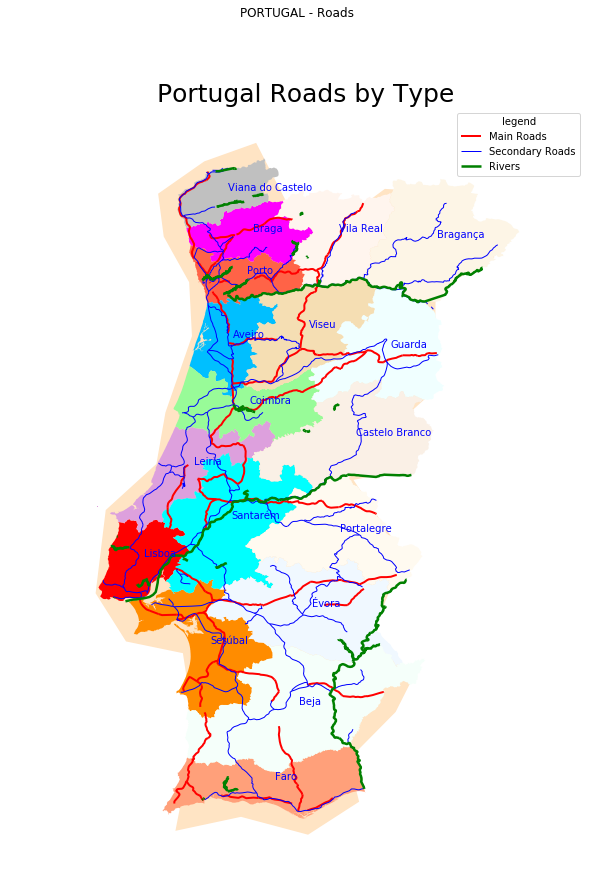

In [254]:
# PLOT The Roads
country_boundary = portugal
lines_p  =  continental_p_roads
lines_s  =  continental_s_roads
lines_r  =  continental_lines_rivers

# make it a bit nicer using a dictionary to assign colors and line widths
road_color = [['red',2], ['blue',1], ['green',2.5]]

# PLOT State points
f, ax = plt.subplots(1, figsize=(10,14))
ax.set_axis_on()
f.suptitle('PORTUGAL - Roads')

# Plot all the map
country_boundary.plot(ax=ax, edgecolor = "black", 
                      facecolor='blue', alpha=1, 
                      linewidth=0, color='bisque', legend = True)  

# Plot all the main roads
lines_p.plot(ax=ax, color=road_color[0][0], 
                       label = 'Main Roads',
                       linewidth=road_color[0][1])


# Plot all the secondary roads
lines_s.plot(ax=ax, color=road_color[1][0], 
                       label = 'Secondary Roads',
                       linewidth=road_color[1][1])


# Plot all the rivers
lines_r.plot(ax=ax, color=road_color[2][0], 
                       label = 'Rivers',
                       linewidth=road_color[2][1])

# Put colors by district d'accord the greatest population  
for i,c in enumerate(x1_table.Distrito):
    # Plot a UF map
    ax = x1_table[x1_table.index == i].plot(ax=ax,  facecolor='blue', alpha=1, linewidth=0, color=color_list[i])

# Plot the Districts labels 
for x, y, label in zip(points.geometry.x, points.geometry.y, points.Distrito):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), alpha=3, textcoords="offset points",color='blue')
    
ax.legend(title="legend")
ax.set_title("Portugal Roads by Type", fontsize=25)
ax.set_axis_off()
plt.axis('equal');

In [216]:
rivers.head()

,osm_id,name,tipo,width,geometry
index_left,,,,,
0,4718597,None,river,0,"LINESTRING (-8.490691699999999 38.9709642, -8...."
3,12641715,None,river,0,"LINESTRING (-8.8354898 39.0048754, -8.83484600..."
4,12641805,None,river,0,"LINESTRING (-8.8395753 39.0185739, -8.83923200..."
5,23102773,Rio Ceira,river,0,"LINESTRING (-8.394681500000001 40.1725883, -8...."
6,23109746,Rio Ceira,river,0,"LINESTRING (-8.325596000000001 40.174491, -8.3..."


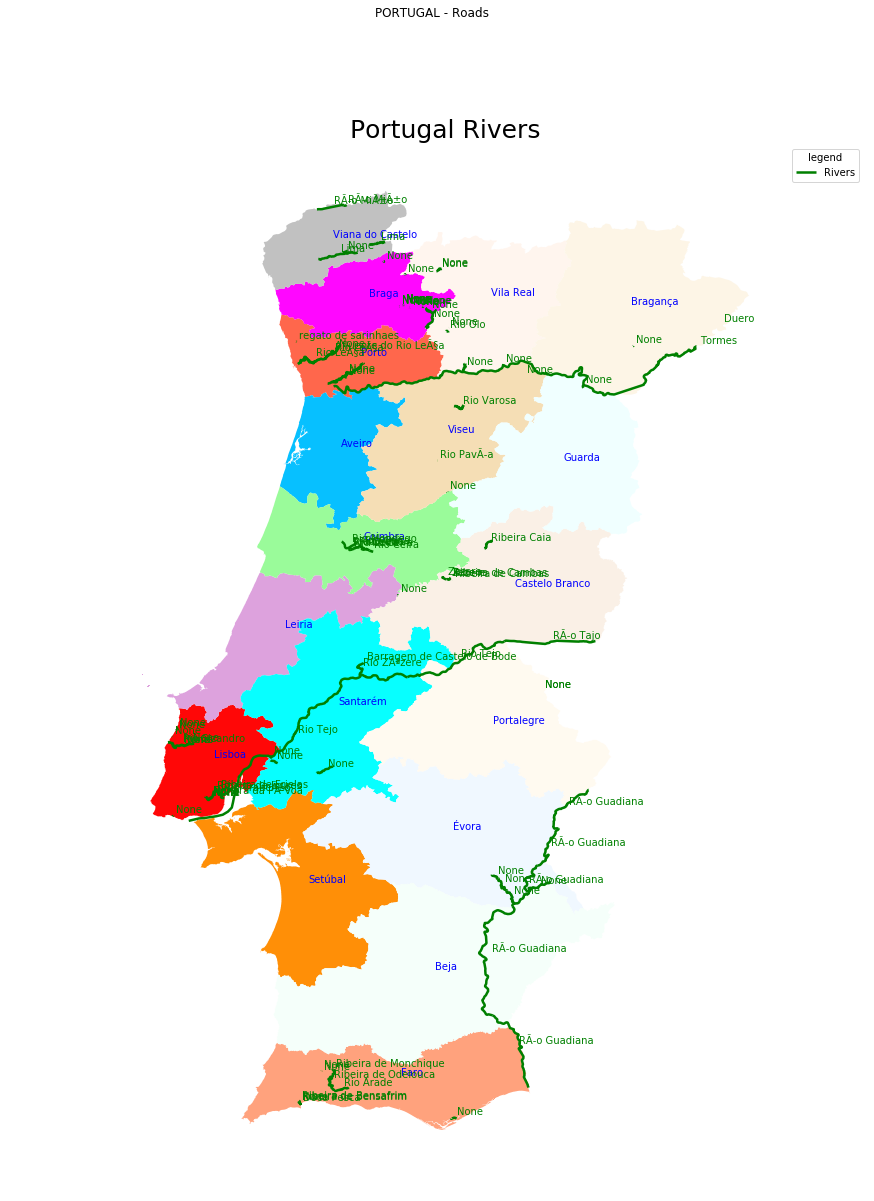

In [256]:
# PLOT all The Rivers
country_boundary = portugal
lines_r  =  continental_all_rivers

# make it a bit nicer using a dictionary to assign colors and line widths
road_color = [['red',2], ['blue',1], ['green',2.5]]

# PLOT State points
f, ax = plt.subplots(1, figsize=(15,19))
ax.set_axis_on()
f.suptitle('PORTUGAL - Roads')

# Plot all the map
#country_boundary.plot(ax=ax, edgecolor = "black", 
#                      facecolor='blue', alpha=1, 
#                      linewidth=0, color='bisque', legend = True)  

# Plot all the rivers
lines_r.plot(ax=ax, color=road_color[2][0], 
                       label = 'Rivers',
                       linewidth=road_color[2][1])

# Put colors by district d'accord the greatest population  
for i,c in enumerate(x1_table.Distrito):
    # Plot a UF map
    ax = x1_table[x1_table.index == i].plot(ax=ax, alpha=8, linewidth=1, color=color_list[i])

# Plot the Districts labels 
for x, y, label in zip(points.geometry.x, points.geometry.y, points.Distrito):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), alpha=3, textcoords="offset points",color='blue')

# Plot the River labels 
for x, y, label in zip(points_rivers_all.geometry.x, points_rivers_all.geometry.y, points_rivers_all.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), alpha=3, textcoords="offset points",color='Green')
    
ax.legend(title="legend")
ax.set_title("Portugal Rivers", fontsize=25)
ax.set_axis_off()
plt.axis('equal');